## **FNN Classification**

### Binary CLassification

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Create a binary target variable for bianry classification
median_bill = tips['total_bill'].median()
tips['high_bill'] = (tips['total_bill'] > median_bill).astype(int)

In [6]:
# Load the dataset
tips_1 = sns.load_dataset("tips")
tips_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.describe()

,total_bill,tip,sex,smoker,day,time,size,high_bill
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672,0.500000
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100,0.501028
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000,0.500000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,1.000000


In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,high_bill
0,16.99,1.01,0,0,2,0,2,0
1,10.34,1.66,1,0,2,0,3,0
2,21.01,3.50,1,0,2,0,3,1
3,23.68,3.31,1,0,2,0,2,1
4,24.59,3.61,0,0,2,0,4,1


In [5]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Create a binary target variable for bianry classification
median_bill = tips['total_bill'].median()
tips['high_bill'] = (tips['total_bill'] > median_bill).astype(int)

# Split the data into training and test sets
X = tips.drop(['total_bill', 'high_bill'], axis=1)
y = tips['high_bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
7/7 [==============================] - 1s 56ms/step - loss: 0.7496 - accuracy: 0.3744
Epoch 2/10
7/7 [==============================] - 0s 19ms/step - loss: 0.7342 - accuracy: 0.4000
Epoch 3/10
7/7 [==============================] - 0s 15ms/step - loss: 0.7205 - accuracy: 0.4359
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 0.7089 - accuracy: 0.4769
Epoch 5/10
7/7 [==============================] - 0s 14ms/step - loss: 0.6963 - accuracy: 0.5538
Epoch 6/10
7/7 [==============================] - 0s 33ms/step - loss: 0.6846 - accuracy: 0.5795
Epoch 7/10
7/7 [==============================] - 0s 17ms/step - loss: 0.6741 - accuracy: 0.5795
Epoch 8/10
7/7 [==============================] - 0s 16ms/step - loss: 0.6637 - accuracy: 0.5692
Epoch 9/10
7/7 [==============================] - 0s 22ms/step - loss: 0.6537 - accuracy: 0.5744
Epoch 10/10
2/2 [==============================] - 0s 100ms/step - loss: 0.6437 - accuracy: 0.5510
Test Accuracy: 55.10


### **Multiclass Classification**

In [31]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
tips = sns.load_dataset("tips")

# Preprocess the data
# Encoding categories
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])


# Split the data into training and test sets
X = tips.drop(['day'], axis=1)
y = tips['day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building the model
# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.unique().shape[0], activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # see below for categorical_crossentropy

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100}')

Epoch 1/10
5/5 [==============================] - 0s 54ms/step - loss: 1.4742 - accuracy: 0.3141 - val_loss: 1.4661 - val_accuracy: 0.2308
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 1.4213 - accuracy: 0.3333 - val_loss: 1.4199 - val_accuracy: 0.3077
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 1.3716 - accuracy: 0.3654 - val_loss: 1.3771 - val_accuracy: 0.3590
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 1.3290 - accuracy: 0.4231 - val_loss: 1.3372 - val_accuracy: 0.3846
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 1.2884 - accuracy: 0.4615 - val_loss: 1.2988 - val_accuracy: 0.4615
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 1.2473 - accuracy: 0.4872 - val_loss: 1.2626 - val_accuracy: 0.5385
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 1.2107 - accuracy: 0.5641 - val_loss: 1.2253 - val_accuracy: 0.5641
Epoch 8/10
5/5 [===========

Epoch 1/50
5/5 [==============================] - 0s 19ms/step - loss: 0.7631 - accuracy: 0.6731 - val_loss: 0.8325 - val_accuracy: 0.6923
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.7467 - accuracy: 0.6795 - val_loss: 0.8250 - val_accuracy: 0.6923
Epoch 3/50
5/5 [==============================] - 0s 15ms/step - loss: 0.7323 - accuracy: 0.6731 - val_loss: 0.8176 - val_accuracy: 0.6923
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.7205 - accuracy: 0.6731 - val_loss: 0.8122 - val_accuracy: 0.6923
Epoch 5/50
5/5 [==============================] - 0s 13ms/step - loss: 0.7088 - accuracy: 0.6795 - val_loss: 0.8091 - val_accuracy: 0.6923
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6988 - accuracy: 0.6795 - val_loss: 0.8064 - val_accuracy: 0.6923
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6894 - accuracy: 0.6667 - val_loss: 0.8052 - val_accuracy: 0.6923
Epoch 8/50
5/5 [===========

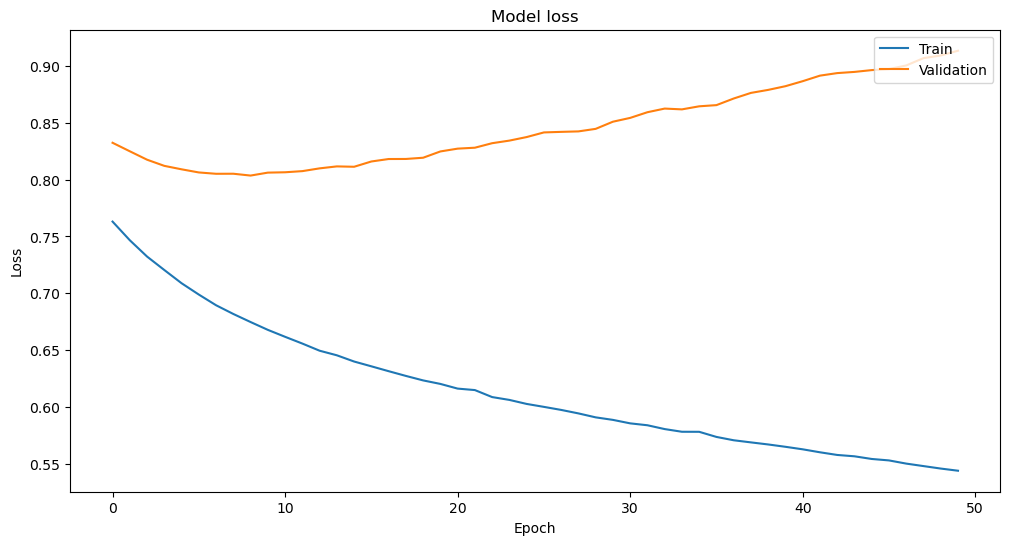

In [33]:
import matplotlib.pyplot as plt
# Train the model and store the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [34]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

#compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Then use these one-hot encoded labels for training and evaluation
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Accuracy: {accuracy*100}')

Epoch 1/10
5/5 [==============================] - 0s 57ms/step - loss: 0.5464 - accuracy: 0.7500 - val_loss: 0.9149 - val_accuracy: 0.5897
Epoch 2/10
5/5 [==============================] - 0s 24ms/step - loss: 0.5408 - accuracy: 0.7564 - val_loss: 0.9156 - val_accuracy: 0.5897
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.5373 - accuracy: 0.7628 - val_loss: 0.9211 - val_accuracy: 0.6154
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5352 - accuracy: 0.7692 - val_loss: 0.9274 - val_accuracy: 0.6154
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.5350 - accuracy: 0.7564 - val_loss: 0.9299 - val_accuracy: 0.5897
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5310 - accuracy: 0.7692 - val_loss: 0.9313 - val_accuracy: 0.5641
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.5292 - accuracy: 0.7692 - val_loss: 0.9339 - val_accuracy: 0.5897
Epoch 8/10
5/5 [===========

Epoch 1/50
5/5 [==============================] - 0s 24ms/step - loss: 0.5223 - accuracy: 0.7628 - val_loss: 0.9483 - val_accuracy: 0.5897
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5208 - accuracy: 0.7628 - val_loss: 0.9483 - val_accuracy: 0.5641
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 0.5189 - accuracy: 0.7628 - val_loss: 0.9497 - val_accuracy: 0.5641
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5174 - accuracy: 0.7756 - val_loss: 0.9546 - val_accuracy: 0.5641
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5159 - accuracy: 0.7628 - val_loss: 0.9600 - val_accuracy: 0.5641
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 0.5155 - accuracy: 0.7692 - val_loss: 0.9633 - val_accuracy: 0.5641
Epoch 7/50
5/5 [==============================] - 0s 20ms/step - loss: 0.5129 - accuracy: 0.7692 - val_loss: 0.9659 - val_accuracy: 0.5641
Epoch 8/50
5/5 [===========

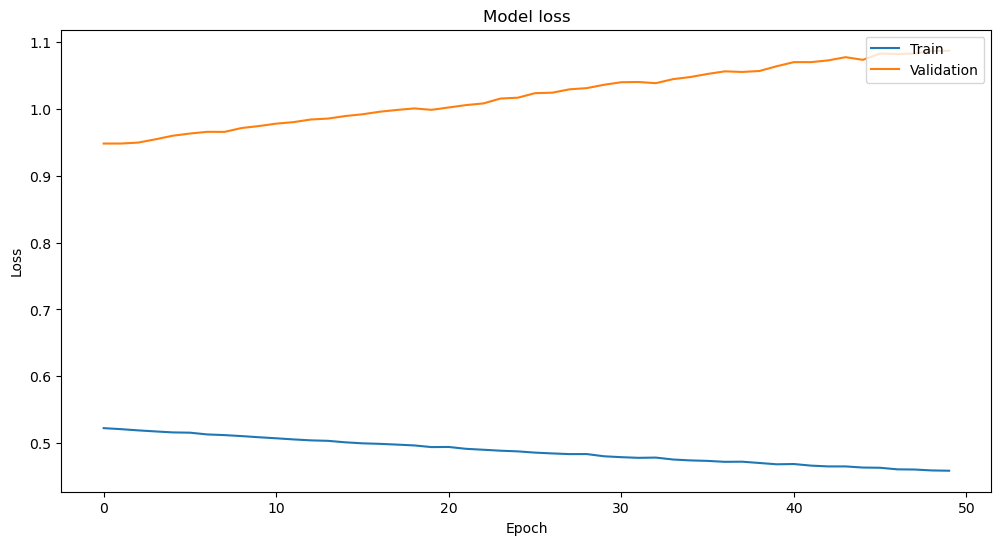

In [35]:
import matplotlib.pyplot as plt
# Train the model and store the history
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()